___
# Ciência dos Dados - PROJETO 1

Iago Rainha Mendes
___

## Como a renda influencia o acesso privilegiado a informação em São Paulo e qual foi a variação dessa taxa entre 2013 e 2015.

___
## Introdução

O estudo busca descobrir a influência que a renda tem sobre o acesso a informação e como isso variou ao longo de três anos, baseado nos dados das PNADs de 2013, 2014 e 2015.

Foi definido que o acesso privilegiado a informação é o acesso a diversos serviços que divulgam conteúdo, como celular, redes móveis (3G e 4G), banda larga, televisão por assinatura, entre outros.

Podemos comparar as porcentagens presentes em cada grafico para ver a variação da relação entre renda e acesso a informação.

___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Dell\Desktop\Insper\2017.2\Ciência dos Dados\CD17-Iago


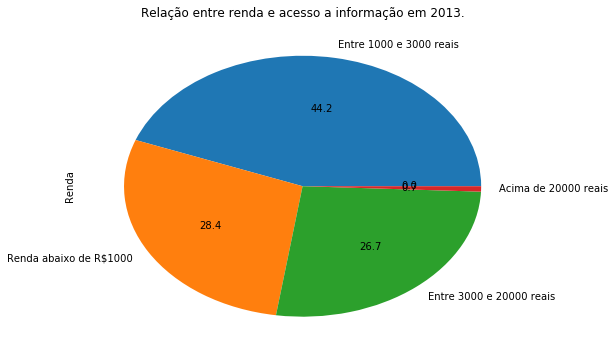

In [3]:
#DADOS DE 2013 
dados_2013 = pd.read_csv('DOM2013.csv',sep=',')
dados_2013 = pd.DataFrame(dados_2013)

#definindo as variaveis a serem analisadas 
dados_2013 = dados_2013.loc[:,["UF","V0220", "V02272","V02322","V02424","V02426","V4621"]]

#retirando dados nulos do df
dados_2013 = dados_2013[pd.notnull(dados_2013.V0220) &\
                        pd.notnull(dados_2013.V02272) &\
                        pd.notnull(dados_2013.V02322) &\
                        pd.notnull(dados_2013.V02424) &\
                        pd.notnull(dados_2013.V02426) &\
                        pd.notnull(dados_2013.V4621)]

#definindo o estado como São Paulo
dados_2013 = dados_2013.loc[(dados_2013.UF == 35)]

#criando grafico de dispersão de renda em sp (próxima cell)
dados_renda_2013 = dados_2013.loc[:,["V4621"]]
renda_13 = dados_renda_2013[dados_renda_2013 < 30000]

#Selecionando as respostas desejadas para filtrar a tabela
dados_2013 = dados_2013.loc[(dados_2013.V0220 == 2) &\
                            (dados_2013.V02272 == 1) &\
                            (dados_2013.V02322 == 2) &\
                            (dados_2013.V02424 == 2) &\
                            (dados_2013.V02426 == 2) &\
                            (dados_2013.V4621 != 999999999999)]

#tornando as colunas em categorias e renomeando as variáveis
dados_2013.UF = dados_2013.UF.astype('category')
dados_2013.UF.cat.categories = {"São Paulo"}
dados_2013.V0220  = dados_2013.V0220.astype('category')
dados_2013.V0220.cat.categories = {"Sim"}
dados_2013.V02272 = dados_2013.V02272.astype('category')
dados_2013.V02272.cat.categories = {"Sim"}
dados_2013.V02322 = dados_2013.V02322.astype('category')
dados_2013.V02322.cat.categories = {"Sim"}
dados_2013.V02424 = dados_2013.V02424.astype('category')
dados_2013.V02424.cat.categories = {"Sim"}
dados_2013.V02426 = dados_2013.V02426.astype('category')
dados_2013.V02426.cat.categories = {"Sim"}


#dividindo a coluna de renda em bins, para ter faixas de renda mais definidas
coluna_renda = pd.cut(dados_2013.V4621, bins=[-1,1000,3000,20000,615000]\
                                      , labels=["Renda abaixo de R$1000",
                                                "Entre 1000 e 3000 reais",
                                                "Entre 3000 e 20000 reais",
                                                "Acima de 20000 reais"])

#adicionando a coluna de renda ao df original
dados_2013["Renda"] = coluna_renda
dados_2013 = dados_2013.loc[:,["UF","V0220", "V02272","V02322","V02424","V02426","Renda"]]
dados_2013 = dados_2013.rename(columns={"UF":"Estado",\
                                        "V0220":"Celular",\
                                        "V02272":"Televisão por assinatura",\
                                        "V02322":"Acesso a internet no próprio domicílio",\
                                        "V02424":"Acesso a internet por 3g ou 4g",\
                                        "V02426":"Acesso por banda larga"})  

#criando planilha no excel com os dados selecionados
dados_2013.to_csv("dados_2013menor.csv")

#adicionando uma nova categoria em Renda para adicionar os dados indisponíveis de renda
dados_2013.Renda = dados_2013.Renda.cat.add_categories(["Dado Indisponível"])
dados_2013.Renda.fillna("Dado Indisponível")

#plotando o gráfico do jeito pie, com porcentagem e de tamanho (8,6)
dados_2013.Renda.value_counts().plot(kind="pie", autopct="%.1f", figsize=(8,6),\
                                     title='Relação entre renda e acesso a informação em 2013.')

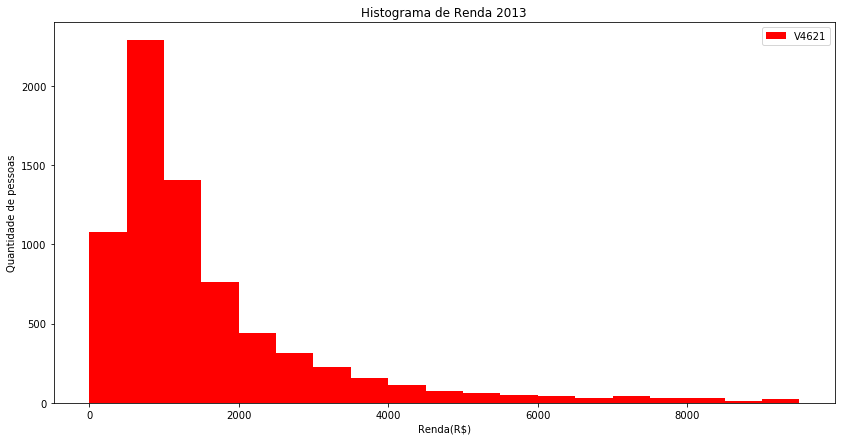

In [11]:
#Gráfico Quantitativo- 2013
renda_13.plot(kind='hist',bins = range(0,10000,500),  figsize=(14,7), color=("red"))
plt.title('Histograma de Renda 2013')
plt.xlabel('Renda(R$)')
plt.ylabel("Quantidade de pessoas")

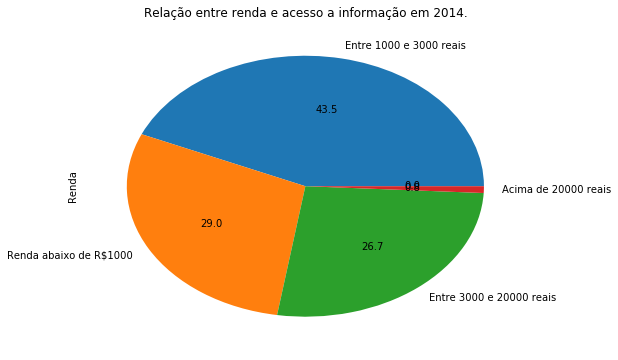

In [5]:
#DADOS DE 2014
dados_2014 = pd.read_csv('DOM2014.csv',sep=',')
dados_2014 = pd.DataFrame(dados_2014)

#definindo as variaveis a serem analisadas 
dados_2014 = dados_2014.loc[:,["UF","V0220", "V02272","V02322","V02424","V02426","V4621"]]

#retirando dados nulos do df
dados_2014 = dados_2014[pd.notnull(dados_2014.V0220) &\
                        pd.notnull(dados_2014.V02272) &\
                        pd.notnull(dados_2014.V02322) &\
                        pd.notnull(dados_2014.V02424) &\
                        pd.notnull(dados_2014.V02426) &\
                        pd.notnull(dados_2014.V4621)]

#definindo o estado como São Paulo
dados_2014 = dados_2014.loc[(dados_2014.UF == 35)]

#criando grafico de dispersão de renda em sp (próxima cell)
dados_renda_2014 = dados_2014.loc[:,["V4621"]]
renda_14 = dados_renda_2014[dados_renda_2014 < 30000]

#Selecionando as respostas desejadas para filtrar a tabela
dados_2014 = dados_2014.loc[(dados_2014.V0220 == 2) &\
                            (dados_2014.V02272 == 1) &\
                            (dados_2014.V02322 == 2) &\
                            (dados_2014.V02424 == 2) &\
                            (dados_2014.V02426 == 2) &\
                            (dados_2014.V4621 != 999999999999)]

#tornando as colunas em categorias e renomeando as variáveis
dados_2014.UF = dados_2014.UF.astype('category')
dados_2014.UF.cat.categories = {"São Paulo"}
dados_2014.V0220  = dados_2014.V0220.astype('category')
dados_2014.V0220.cat.categories = {"Sim"}
dados_2014.V02272 = dados_2014.V02272.astype('category')
dados_2014.V02272.cat.categories = {"Sim"}
dados_2014.V02322 = dados_2014.V02322.astype('category')
dados_2014.V02322.cat.categories = {"Sim"}
dados_2014.V02424 = dados_2014.V02424.astype('category')
dados_2014.V02424.cat.categories = {"Sim"}
dados_2014.V02426 = dados_2014.V02426.astype('category')
dados_2014.V02426.cat.categories = {"Sim"}


#dividindo a coluna de renda em bins, para ter faixas de renda mais definidas
coluna_renda = pd.cut(dados_2014.V4621, bins=[-1,1000,3000,20000,615000]\
                                      , labels=["Renda abaixo de R$1000",
                                                "Entre 1000 e 3000 reais",
                                                "Entre 3000 e 20000 reais",
                                                "Acima de 20000 reais"])

#adicionando a coluna de renda ao df original
dados_2014["Renda"] = coluna_renda
dados_2014 = dados_2014.loc[:,["UF","V0220", "V02272","V02322","V02424","V02426","Renda"]]
dados_2014 = dados_2014.rename(columns={"UF":"Estado",\
                                        "V0220":"Celular",\
                                        "V02272":"Televisão por assinatura",\
                                        "V02322":"Acesso a internet no próprio domicílio",\
                                        "V02424":"Acesso a internet por 3g ou 4g",\
                                        "V02426":"Acesso por banda larga"})  

#criando planilha no excel com os dados selecionados
dados_2014.to_csv("dados_2014menor.csv")

#adicionando uma nova categoria em Renda para adicionar os dados indisponíveis de renda
dados_2014.Renda = dados_2014.Renda.cat.add_categories(["Dado Indisponível"])
dados_2014.Renda.fillna("Dado Indisponível")

#plotando o gráfico do jeito pie, com porcentagem e de tamanho (8,6)
dados_2014.Renda.value_counts().plot(kind="pie", autopct="%.1f", figsize=(8,6),\
                                     title='Relação entre renda e acesso a informação em 2014.')

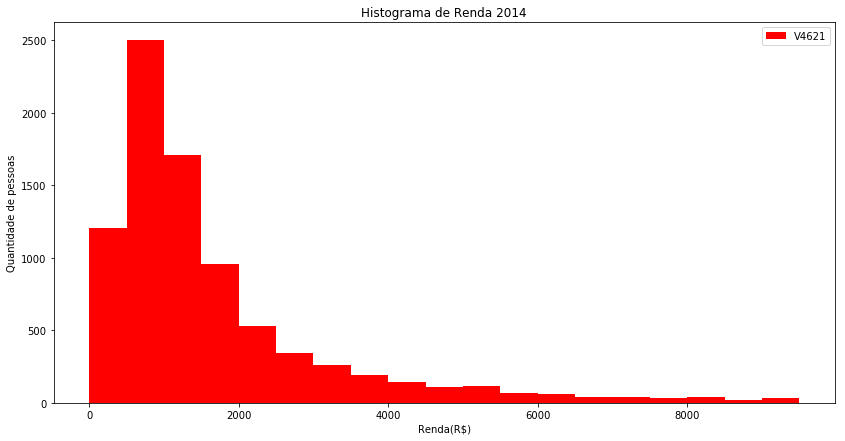

In [10]:
#Gráfico Quantitativo- 2014
renda_14.plot(kind='hist',bins = range(0,10000,500),  figsize=(14,7), color=("red"))
plt.title('Histograma de Renda 2014')
plt.xlabel('Renda(R$)')
plt.ylabel("Quantidade de pessoas")

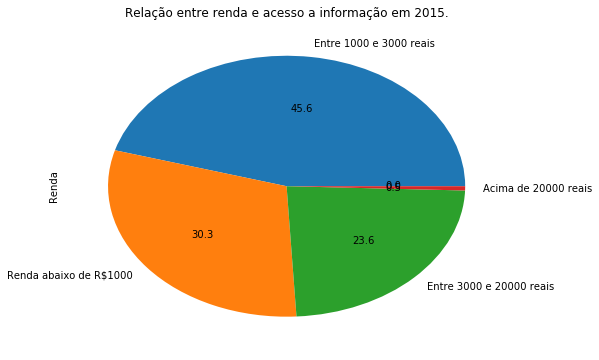

In [7]:
#DADOS DE 2015
dados_2015 = pd.read_csv('DOM2015.csv',sep=',')
dados_2015 = pd.DataFrame(dados_2015)

#definindo as variaveis a serem analisadas 
dados_2015 = dados_2015.loc[:,["UF","V0220", "V02272","V02322","V02424","V02426","V4621"]]

#retirando dados nulos do df
dados_2015 = dados_2015[pd.notnull(dados_2015.V0220) &\
                        pd.notnull(dados_2015.V02272) &\
                        pd.notnull(dados_2015.V02322) &\
                        pd.notnull(dados_2015.V02424) &\
                        pd.notnull(dados_2015.V02426) &\
                        pd.notnull(dados_2015.V4621)]

#definindo o estado como São Paulo
dados_2015 = dados_2015.loc[(dados_2015.UF == 35)]

#criando grafico de dispersão de renda em sp (próxima cell)
dados_renda_2015 = dados_2015.loc[:,["V4621"]]
renda_15 = dados_renda_2013[dados_renda_2015 < 30000]

#Selecionando as respostas desejadas para filtrar a tabela
dados_2015 = dados_2015.loc[(dados_2015.V0220 == 2) &\
                            (dados_2015.V02272 == 1) &\
                            (dados_2015.V02322 == 2) &\
                            (dados_2015.V02424 == 2) &\
                            (dados_2015.V02426 == 2) &\
                            (dados_2015.V4621 != 999999999999)]

#tornando as colunas em categorias e renomeando as variáveis
dados_2015.UF = dados_2015.UF.astype('category')
dados_2015.UF.cat.categories = {"São Paulo"}
dados_2015.V0220  = dados_2015.V0220.astype('category')
dados_2015.V0220.cat.categories = {"Sim"}
dados_2015.V02272 = dados_2015.V02272.astype('category')
dados_2015.V02272.cat.categories = {"Sim"}
dados_2015.V02322 = dados_2015.V02322.astype('category')
dados_2015.V02322.cat.categories = {"Sim"}
dados_2015.V02424 = dados_2015.V02424.astype('category')
dados_2015.V02424.cat.categories = {"Sim"}
dados_2015.V02426 = dados_2015.V02426.astype('category')
dados_2015.V02426.cat.categories = {"Sim"}


#dividindo a coluna de renda em bins, para ter faixas de renda mais definidas
coluna_renda = pd.cut(dados_2015.V4621, bins=[-1,1000,3000,20000,615000]\
                                      , labels=["Renda abaixo de R$1000",
                                                "Entre 1000 e 3000 reais",
                                                "Entre 3000 e 20000 reais",
                                                "Acima de 20000 reais"])

#adicionando a coluna de renda ao df original
dados_2015["Renda"] = coluna_renda
dados_2015 = dados_2015.loc[:,["UF","V0220", "V02272","V02322","V02424","V02426","Renda"]]
dados_2015 = dados_2015.rename(columns={"UF":"Estado",\
                                        "V0220":"Celular",\
                                        "V02272":"Televisão por assinatura",\
                                        "V02322":"Acesso a internet no próprio domicílio",\
                                        "V02424":"Acesso a internet por 3g ou 4g",\
                                        "V02426":"Acesso por banda larga"})  

#criando planilha no excel com os dados selecionados
dados_2015.to_csv("dados_2015menor.csv")

#adicionando uma nova categoria em Renda para adicionar os dados indisponíveis de renda
dados_2015.Renda = dados_2015.Renda.cat.add_categories(["Dado Indisponível"])
dados_2015.Renda.fillna("Dado Indisponível")

#plotando o gráfico do jeito pie, com porcentagem e de tamanho (8,6)
dados_2015.Renda.value_counts().plot(kind="pie", autopct="%.1f", figsize=(8,6),\
                                     title='Relação entre renda e acesso a informação em 2015.')

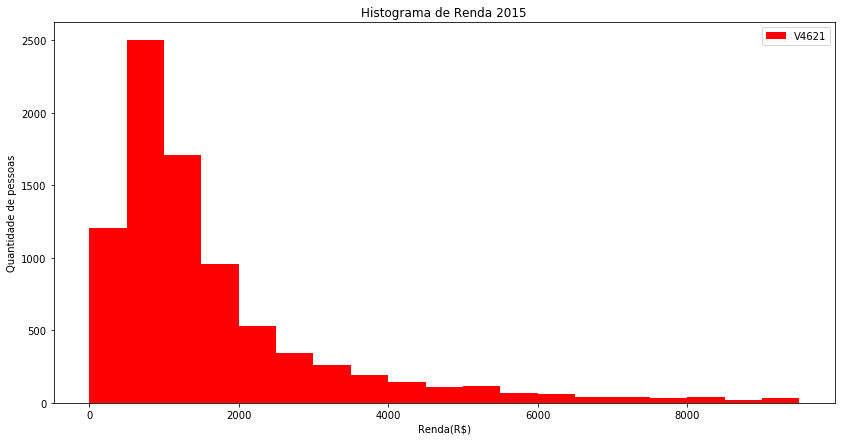

In [9]:
#Gráfico Quantitativo- 2014
renda_14.plot(kind='hist',bins = range(0,10000,500),  figsize=(14,7), color=("red"))
plt.title('Histograma de Renda 2015')
plt.xlabel('Renda(R$)')
plt.ylabel("Quantidade de pessoas")

___
## Conclusão 

        Pelos resultados obtidos acima, podemos perceber como a porcentagem de pessoas que tem acesso a informação de diversas maneiras e com menor renda vem aumentando, o que é um fenômeno esperado, visto que a popularização de serviços que veiculam e dão acesso a informação já é algo esperado.
        A falta de acesso a informação, em qualquer faixa de renda, torna o cidadão mais propenso a alienação, pois ao ter acesso limitado a opiniões divergentes, o mesmo passa a ter uma opinião comum que pode ser manipulada.